# 데이터셋 다운로드

In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv
!unzip mnist-in-csv.zip

 59% 9.00M/15.2M [00:00<00:00, 13.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 22.3MB/s]
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


# 패키지 로드

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 데이터셋 로드

In [ ]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# 라벨 분포
- 0-9 까지의 숫자
- 총 10개의 라벨

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


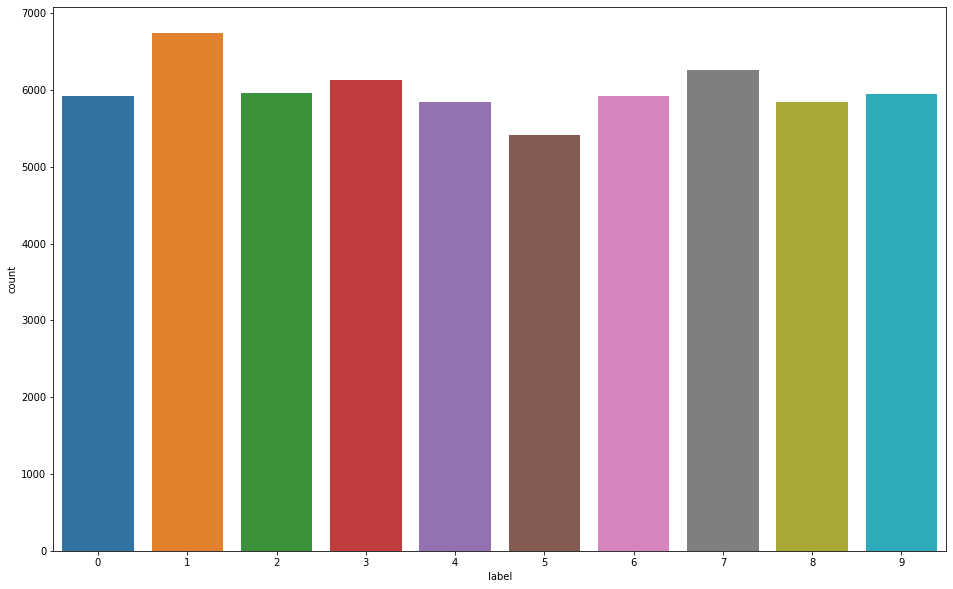

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(train_df['label'])
plt.show()

# 전처리
입력과 출력 나누기

In [ ]:
# Train data
train_df = train_df.astype(np.float32) # 소수점 바꿔주기
x_train = train_df.drop(columns=['label'], axis=1).values # 라벨만 빼고 넘파이 어레이로 넣기
y_train = train_df[['label']].values # 라벨만 취하고 넘파이 어레이에 넣기

# Test data
test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values # 라벨만 빼고 넘파이 어레이로 넣기
y_test = test_df[['label']].values # 라벨만 취하고 넘파이 어레이에 넣기

# 데이터 미리보기

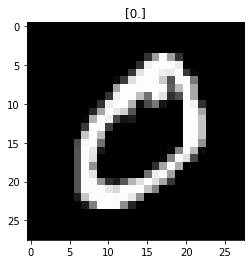

In [ ]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray') # 28*28 이미지로 reshape
plt.show()

# One-hot encoding

In [ ]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

# 일반화
이미지 데이터는 픽셀이 0-255 사이의 정수로 되어 있습니다. 이것을 255로 나누어 0-1 사이의 소수점 데이터로 바꾸고 일반화 시키도록 할게요

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

# 네트워크 구성

In [ ]:
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(10, activation='softmax')(hidden)

model = Model(inputs=input, outputs= output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])
# 'acc' : 정확도

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# 학습

In [ ]:
history = model.fit(
x_train,
y_train,
validation_data=(x_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
1875/1875 [==============================] - 28s 14ms/step - loss: 1.0660 - acc: 0.9086 - val_loss: 0.2156 - val_acc: 0.9407
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1648 - acc: 0.9541 - val_loss: 0.1669 - val_acc: 0.9537
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1410 - acc: 0.9610 - val_loss: 0.1634 - val_acc: 0.9564
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1269 - acc: 0.9662 - val_loss: 0.1731 - val_acc: 0.9576
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1134 - acc: 0.9699 - val_loss: 0.1549 - val_acc: 0.9613
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0938 - acc: 0.9761 - val_loss: 0.1048 - val_acc: 0.9747
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0902 - acc: 0.9769 - val_loss: 0.1196 - val_acc: 0.9703
Epoch 8/20
1875/1875 [==========================

# 학습 결과 그래프

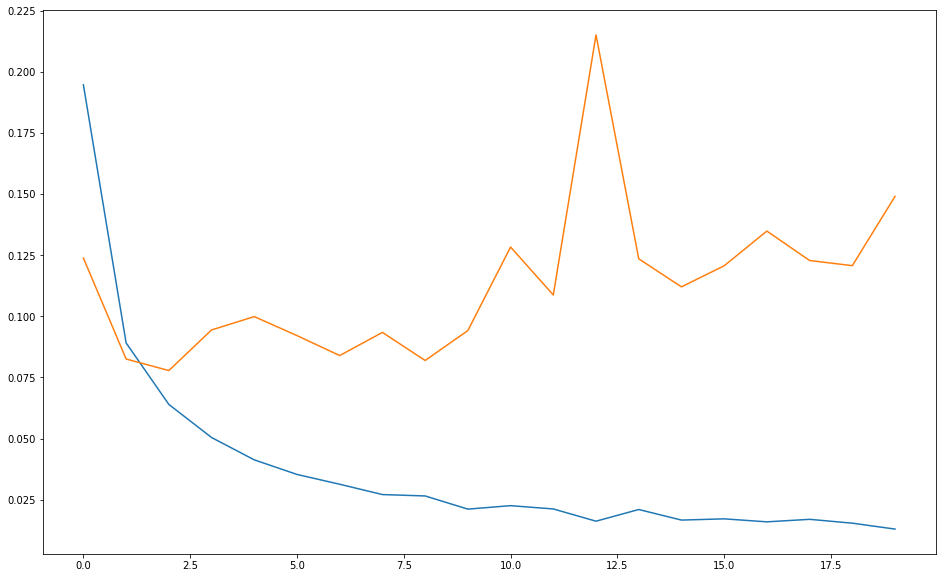

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

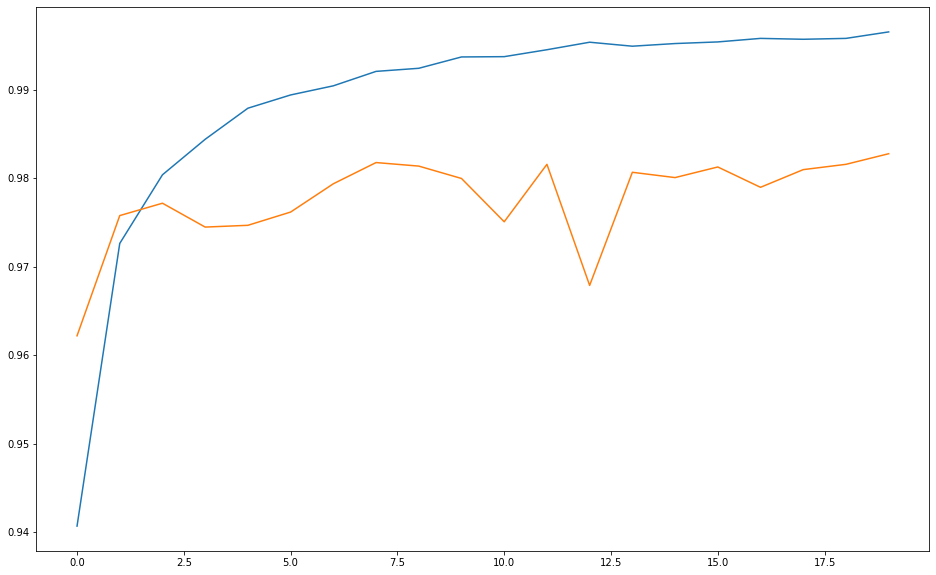

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])